In [1]:
import generate_fibers as gf
import perform_ASTRA as tomo
import numpy as np
import h5py
import json

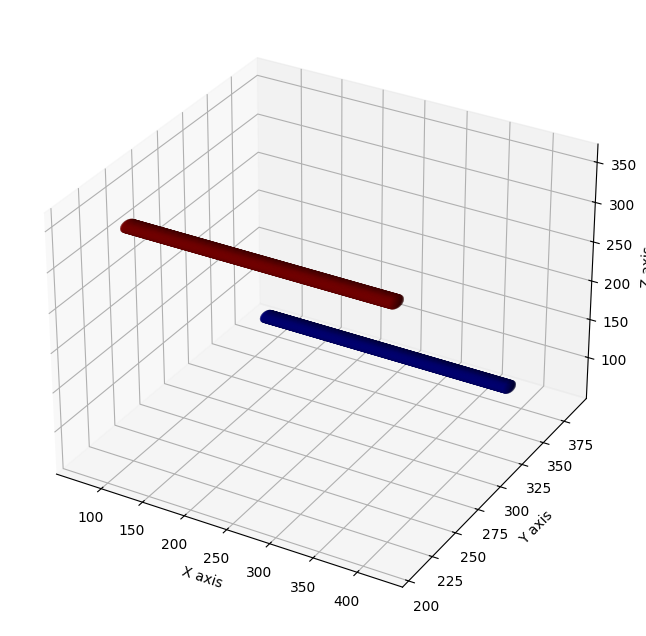

In [2]:
def main():
    with open("parameters.json", "r") as file:
        params = json.load(file)
    
    for i in range(params["num_volumes"]):
        volume = np.zeros(params["volume_dimensions"])
        random_seed = params["random_seed_base"] + i  # diff seed for each volume

        num_successful_fibers, fibers = gf.generate_and_count_fibers(
            volume, random_seed, params["num_fibers"], params["num_clusters"],
            params["cluster_radius"], params["min_length"], params["max_length"],
            params["semi_axes_list"], params["probabilities"], params["curve_amplitude"],
            params["curve_frequency"], params["preferred_direction"], params["bias"], params["fusion_chance"]
        )

        volume_filename = f"fiber_volume_{i}.nii"
        gf.save_as_nifti(volume, volume_filename)

        original_recon, noisy_recon = tomo.perform_tomography(
            volume, params["volume_dimensions"], params["num_angles"], params["geometry_type"],
            params["det_width_u"], params["det_width_v"], params["det_count_x"],
            params["det_count_y"], params["i0"], params["gamma"], params["algorithm"], params["show_plots"]
        )

        gf.save_as_nifti(original_recon, f"original_reconstruction_{i}.nii")
        gf.save_as_nifti(noisy_recon, f"noisy_reconstruction_{i}.nii")

        with h5py.File(f"volume_and_reconstruction_{i}.hdf5", "w") as h5f:
            for key, value in params.items():
                h5f.attrs[key] = str(value)
            h5f.attrs["random_seed"] = str(random_seed)

if __name__ == "__main__":
    main()

In [4]:
# for checking 

file_path = 'volume_and_reconstruction_0.hdf5'

def read_hdf5(file_path):
    with h5py.File(file_path, "r") as file:
        print("Metadata:")
        for attr_name, attr_value in file.attrs.items():
            print(f"{attr_name}: {attr_value}")

read_hdf5(file_path)


Metadata:
algorithm: SIRT3D_CUDA
bias: 1
cluster_radius: 100
curve_amplitude: 0
curve_frequency: 0
det_count_x: 512
det_count_y: 768
det_width_u: 1.0
det_width_v: 1.0
fusion_chance: 0
gamma: 0.01
geometry_type: parallel3d
i0: 100
max_length: 300
min_length: 100
num_angles: 180
num_clusters: 1
num_fibers: 2
num_volumes: 1
preferred_direction: [1, 0, 0]
probabilities: [0.5, 0.5]
random_seed: 42
random_seed_base: 42
semi_axes_list: [[6, 12, 6], [6, 6, 6]]
show_plots: False
volume_dimensions: [512, 512, 512]
